### Overview: This EDA aims to understand the joined table and conduct neccessary feature engineering for modeling. The goal is to predict daily sales of 5 families across 18 stores in Quito.

### Table of Contents:

1. Check for Target Distribution
2. Nulls and Imputation
3. Check for Distributions
4. One-Hot Encoding
5. Datetime Feature Engineering

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Full Table

In [178]:
df = pd.read_csv("quito_whole.csv")
# set the date column to datetime
df["date"]=pd.to_datetime(df["date"])
# set the "date" as index
df.set_index("date", inplace=True)
df.head()

,store_nbr,family,sales,onpromotion,city,state,sto_type,cluster,dcoilwtico,holi_type,locale,description_eng,transactions
date,,,,,,,,,,,,,
2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,First day of the year,NaN
2013-01-01,1,CLEANING,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,First day of the year,NaN
2013-01-01,1,DAIRY,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,First day of the year,NaN
2013-01-01,1,GROCERY I,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,First day of the year,NaN
2013-01-01,1,PRODUCE,0.0,0,Quito,Pichincha,D,13,93.14,Holiday,National,First day of the year,NaN


In [179]:
df.rename(columns={"transactions": "store_trans"}, inplace=True)

In [180]:
df.shape

(151920, 13)

In [181]:
# drop city and state since there is only one value
df = df.drop(columns=["city","state"])
df.head()

,store_nbr,family,sales,onpromotion,sto_type,cluster,dcoilwtico,holi_type,locale,description_eng,store_trans
date,,,,,,,,,,,
2013-01-01,1,BEVERAGES,0.0,0,D,13,93.14,Holiday,National,First day of the year,NaN
2013-01-01,1,CLEANING,0.0,0,D,13,93.14,Holiday,National,First day of the year,NaN
2013-01-01,1,DAIRY,0.0,0,D,13,93.14,Holiday,National,First day of the year,NaN
2013-01-01,1,GROCERY I,0.0,0,D,13,93.14,Holiday,National,First day of the year,NaN
2013-01-01,1,PRODUCE,0.0,0,D,13,93.14,Holiday,National,First day of the year,NaN


#### 1.Check for the trend and distribution of the target

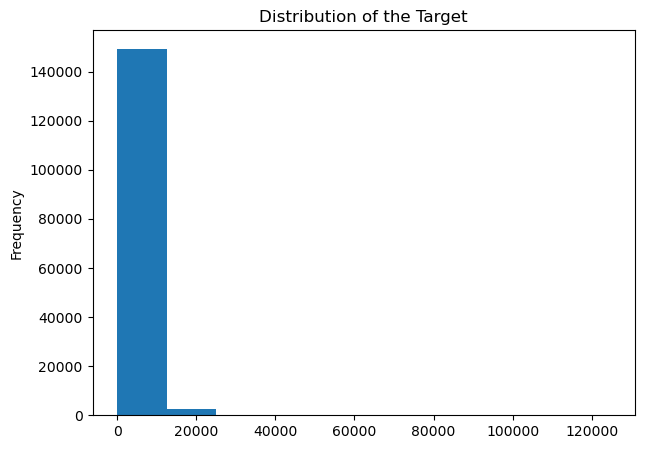

In [182]:
plt.figure(figsize=(7,5))
df["sales"].plot(kind='hist', title="Distribution of the Target")
plt.show()

**Since the data is highly right skewed, I will check for the outliers.**

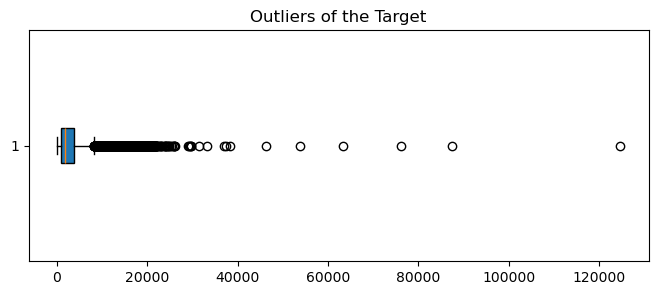

In [183]:
# Create the box plot
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)
boxplot = ax.boxplot(df['sales'], vert=False,patch_artist=True)
# Extract the whiskers
whiskers = [item.get_ydata() for item in boxplot['whiskers']]
max_val = whiskers[1][1]
plt.title("Outliers of the Target")
# Show the plot
plt.show()

In [184]:
# check for number of outliers
df[df["sales"]>=8344]

,store_nbr,family,sales,onpromotion,sto_type,cluster,dcoilwtico,holi_type,locale,description_eng,store_trans
date,,,,,,,,,,,
2013-01-02,3,GROCERY I,8463.000,0,D,8,93.14,NaN,NaN,NaN,3487.0
2013-01-02,44,GROCERY I,10686.000,0,A,5,93.14,NaN,NaN,NaN,4821.0
2013-01-02,45,GROCERY I,11422.000,0,A,11,93.14,NaN,NaN,NaN,4208.0
2013-01-02,46,GROCERY I,10892.000,0,A,14,93.14,NaN,NaN,NaN,4886.0
2013-01-02,47,GROCERY I,10867.000,0,A,14,93.14,NaN,NaN,NaN,4161.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-14,44,PRODUCE,8735.741,10,A,5,47.59,NaN,NaN,NaN,4039.0
2017-08-14,45,GROCERY I,9665.000,39,A,11,47.59,NaN,NaN,NaN,3743.0
2017-08-14,47,GROCERY I,8946.000,40,A,14,47.59,NaN,NaN,NaN,3606.0


From the boxplot, we can see that out of the 9949 outliers, 6 are extremely big.

In [185]:
# check for the reason of extreme outliers
df_sorted = df.sort_values(by='sales', ascending=False)
df_sorted.head(10)

,store_nbr,family,sales,onpromotion,sto_type,cluster,dcoilwtico,holi_type,locale,description_eng,store_trans
date,,,,,,,,,,,
2016-05-02,2,GROCERY I,124717.000,59,D,13,44.75,Event,National,Manabi+16 earthquake,1905.0
2016-04-21,20,GROCERY I,87438.516,53,B,6,43.18,Event,National,Manabi+5 earthquake,1692.0
2016-04-18,45,GROCERY I,76090.000,38,A,11,39.74,Event,National,Manabi+2 earthquake,3895.0
2016-04-26,2,GROCERY I,63434.000,30,D,13,42.52,Event,National,Manabi+10 earthquake,1778.0
2016-04-21,45,GROCERY I,53874.000,44,A,11,43.18,Event,National,Manabi+5 earthquake,3079.0
2013-11-12,44,GROCERY I,46271.000,0,A,5,93.12,NaN,NaN,NaN,3577.0
2017-04-02,9,GROCERY I,38422.625,73,B,6,NaN,NaN,NaN,NaN,2245.0
2016-07-04,20,GROCERY I,37514.926,40,B,6,46.73,NaN,NaN,NaN,1398.0
2014-12-16,44,GROCERY I,37106.000,7,A,5,55.97,NaN,NaN,NaN,5343.0


**Out of the 6 extreme outliers, 5 are attributed to earthquakes. Considering their rarity, I am removing these 5 rows from the model to focus on typical business scenarios and reduce the model's Mean Absolute Error (MAE).**

In [186]:
# remove the 5 extreme outliers caused by earthquake
df = df[df["sales"]<53874]
df.shape

(151915, 11)

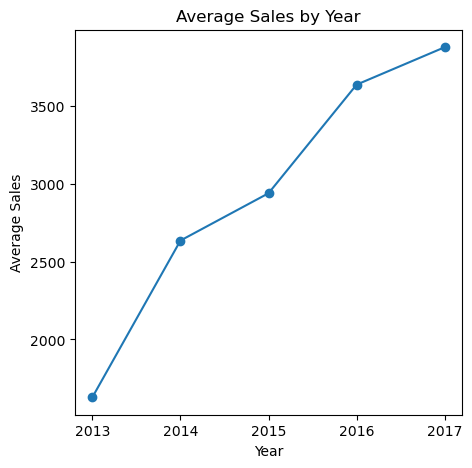

In [187]:
# check for the trends of sales by year, month, day
df["year"] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
yearly_sales = df.groupby(["year"])["sales"].mean()
monthly_sales = df.groupby(["month"])["sales"].mean()
daily_sales = df.groupby(["day"])["sales"].mean()


# Plot sales trends by year
plt.figure(figsize=(5, 5))
yearly_sales.plot(kind="line", marker='o')
plt.xticks(yearly_sales.index)
plt.xlabel("Year")
plt.ylabel("Average Sales")
plt.title("Average Sales by Year")
plt.show()

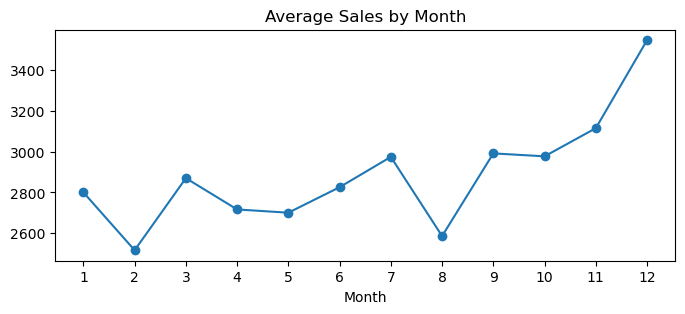

In [188]:
# Plot sales trends by month
plt.figure(figsize=(8,3))
monthly_sales.plot(kind="line", marker='o')
plt.xticks(monthly_sales.index)
plt.xlabel("Month")
plt.title("Average Sales by Month")
plt.show()

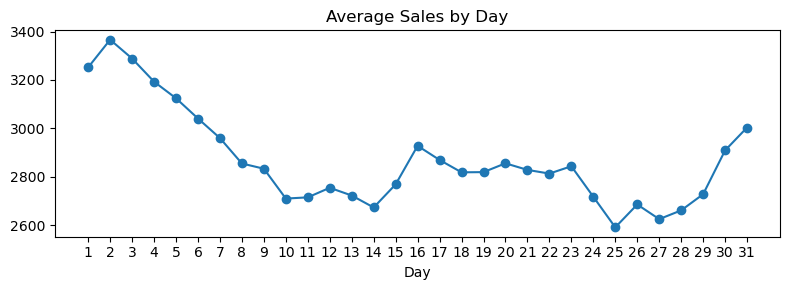

In [189]:
# Plot sales trends by day
plt.figure(figsize=(8,3))
daily_sales.plot(kind="line", marker='o')
plt.xticks(daily_sales.index)
plt.xlabel("Day")
plt.title("Average Sales by Day")

plt.tight_layout()
plt.show()

#### 2. Missing values and imputation

In [190]:
# check for missing values from rest of the features
df.isna().sum()

store_nbr               0
family                  0
sales                   0
onpromotion             0
sto_type                0
cluster                 0
dcoilwtico          43560
holi_type          138600
locale             138600
description_eng    138600
store_trans          5095
year                    0
month                   0
day                     0
dtype: int64

In [191]:
# % of missing values
print(f"dcoilwtico missing:{round(43560/151920*100,2)}%")
print(f"store_trans missing:{round(5095/151920*100,2)}%")

dcoilwtico missing:28.67%
store_trans missing:3.35%


#### We need to impute dcoilwtico and store_trans missing values; As for holiday related columns, since not each day is holiday, we will use current values for modeling.

In [192]:
# check for distinctive null values in "dcoilwtico" 
df_dcoil = df["dcoilwtico"].to_frame().reset_index().drop_duplicates()
df_dcoil.set_index("date", inplace=True)
df_dcoil["dcoilwtico"].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1684 entries, 2013-01-01 to 2017-08-15
Series name: dcoilwtico
Non-Null Count  Dtype  
--------------  -----  
1203 non-null   float64
dtypes: float64(1)
memory usage: 26.3 KB


#### Visualize the nulls in dcoilwtico

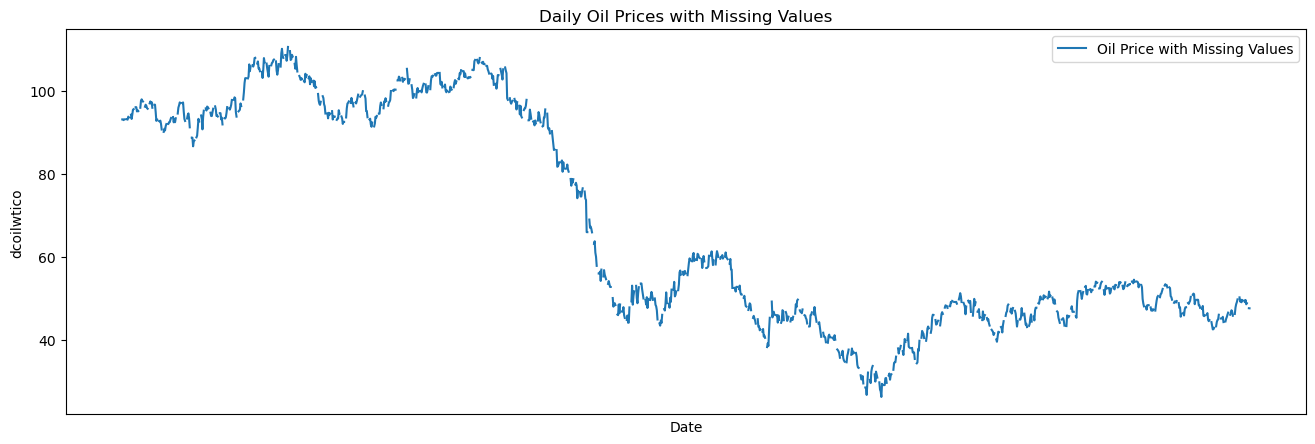

In [193]:
# Visualize the missing data
plt.figure(figsize=(16, 5))
plt.plot(df_dcoil.index, df_dcoil["dcoilwtico"], label='Oil Price with Missing Values')
plt.title('Daily Oil Prices with Missing Values')
plt.xlabel('Date')
plt.ylabel('dcoilwtico')
plt.xticks([])
plt.legend()
plt.show()

#### We can see that the null values are distributed sparsely throughout the whole dataset instead of concentrating in one area. Given that 29% of the data is missing, forward or backward filling is not suitable. Since the daily oil prices exhibit trends and seasonality, we can use a time series-specific interpolation method to fill the missing values.

In [194]:
# fill the nulls
df_dcoil["dcoilwtico_interpolated"]=df_dcoil["dcoilwtico"].interpolate(method="time")
# drop original column
# df_dcoil.drop(columns="dcoilwtico", inplace=True)
# sanity check
df_dcoil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1684 entries, 2013-01-01 to 2017-08-15
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dcoilwtico               1203 non-null   float64
 1   dcoilwtico_interpolated  1684 non-null   float64
dtypes: float64(2)
memory usage: 39.5 KB


In [195]:
# join df_dcoil with origial df
df= df.merge(df_dcoil, left_index=True, right_index=True, how = 'left')
# drop the old column
df=df.drop(columns= ["dcoilwtico_x", "dcoilwtico_y"])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 151915 entries, 2013-01-01 to 2017-08-15
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   store_nbr                151915 non-null  int64  
 1   family                   151915 non-null  object 
 2   sales                    151915 non-null  float64
 3   onpromotion              151915 non-null  int64  
 4   sto_type                 151915 non-null  object 
 5   cluster                  151915 non-null  int64  
 6   holi_type                13315 non-null   object 
 7   locale                   13315 non-null   object 
 8   description_eng          13315 non-null   object 
 9   store_trans              146820 non-null  float64
 10  year                     151915 non-null  int32  
 11  month                    151915 non-null  int32  
 12  day                      151915 non-null  int32  
 13  dcoilwtico_interpolated  151915 non-null  f

#### Fill nulls in "store_trans"

In [196]:
# check for distinctive null values in "store_trans" 
df_store_trans = df[["store_nbr","store_trans"]].reset_index().drop_duplicates()
df_store_trans.set_index("date", inplace=True)
df_store_trans.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30312 entries, 2013-01-01 to 2017-08-15
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   store_nbr    30312 non-null  int64  
 1   store_trans  29294 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 710.4 KB


In [197]:
# check for the store number list
store_nbr_list = df_store_trans["store_nbr"].drop_duplicates().tolist()
store_nbr_list

[1, 10, 17, 18, 2, 20, 3, 4, 44, 45, 46, 47, 48, 49, 6, 7, 8, 9]

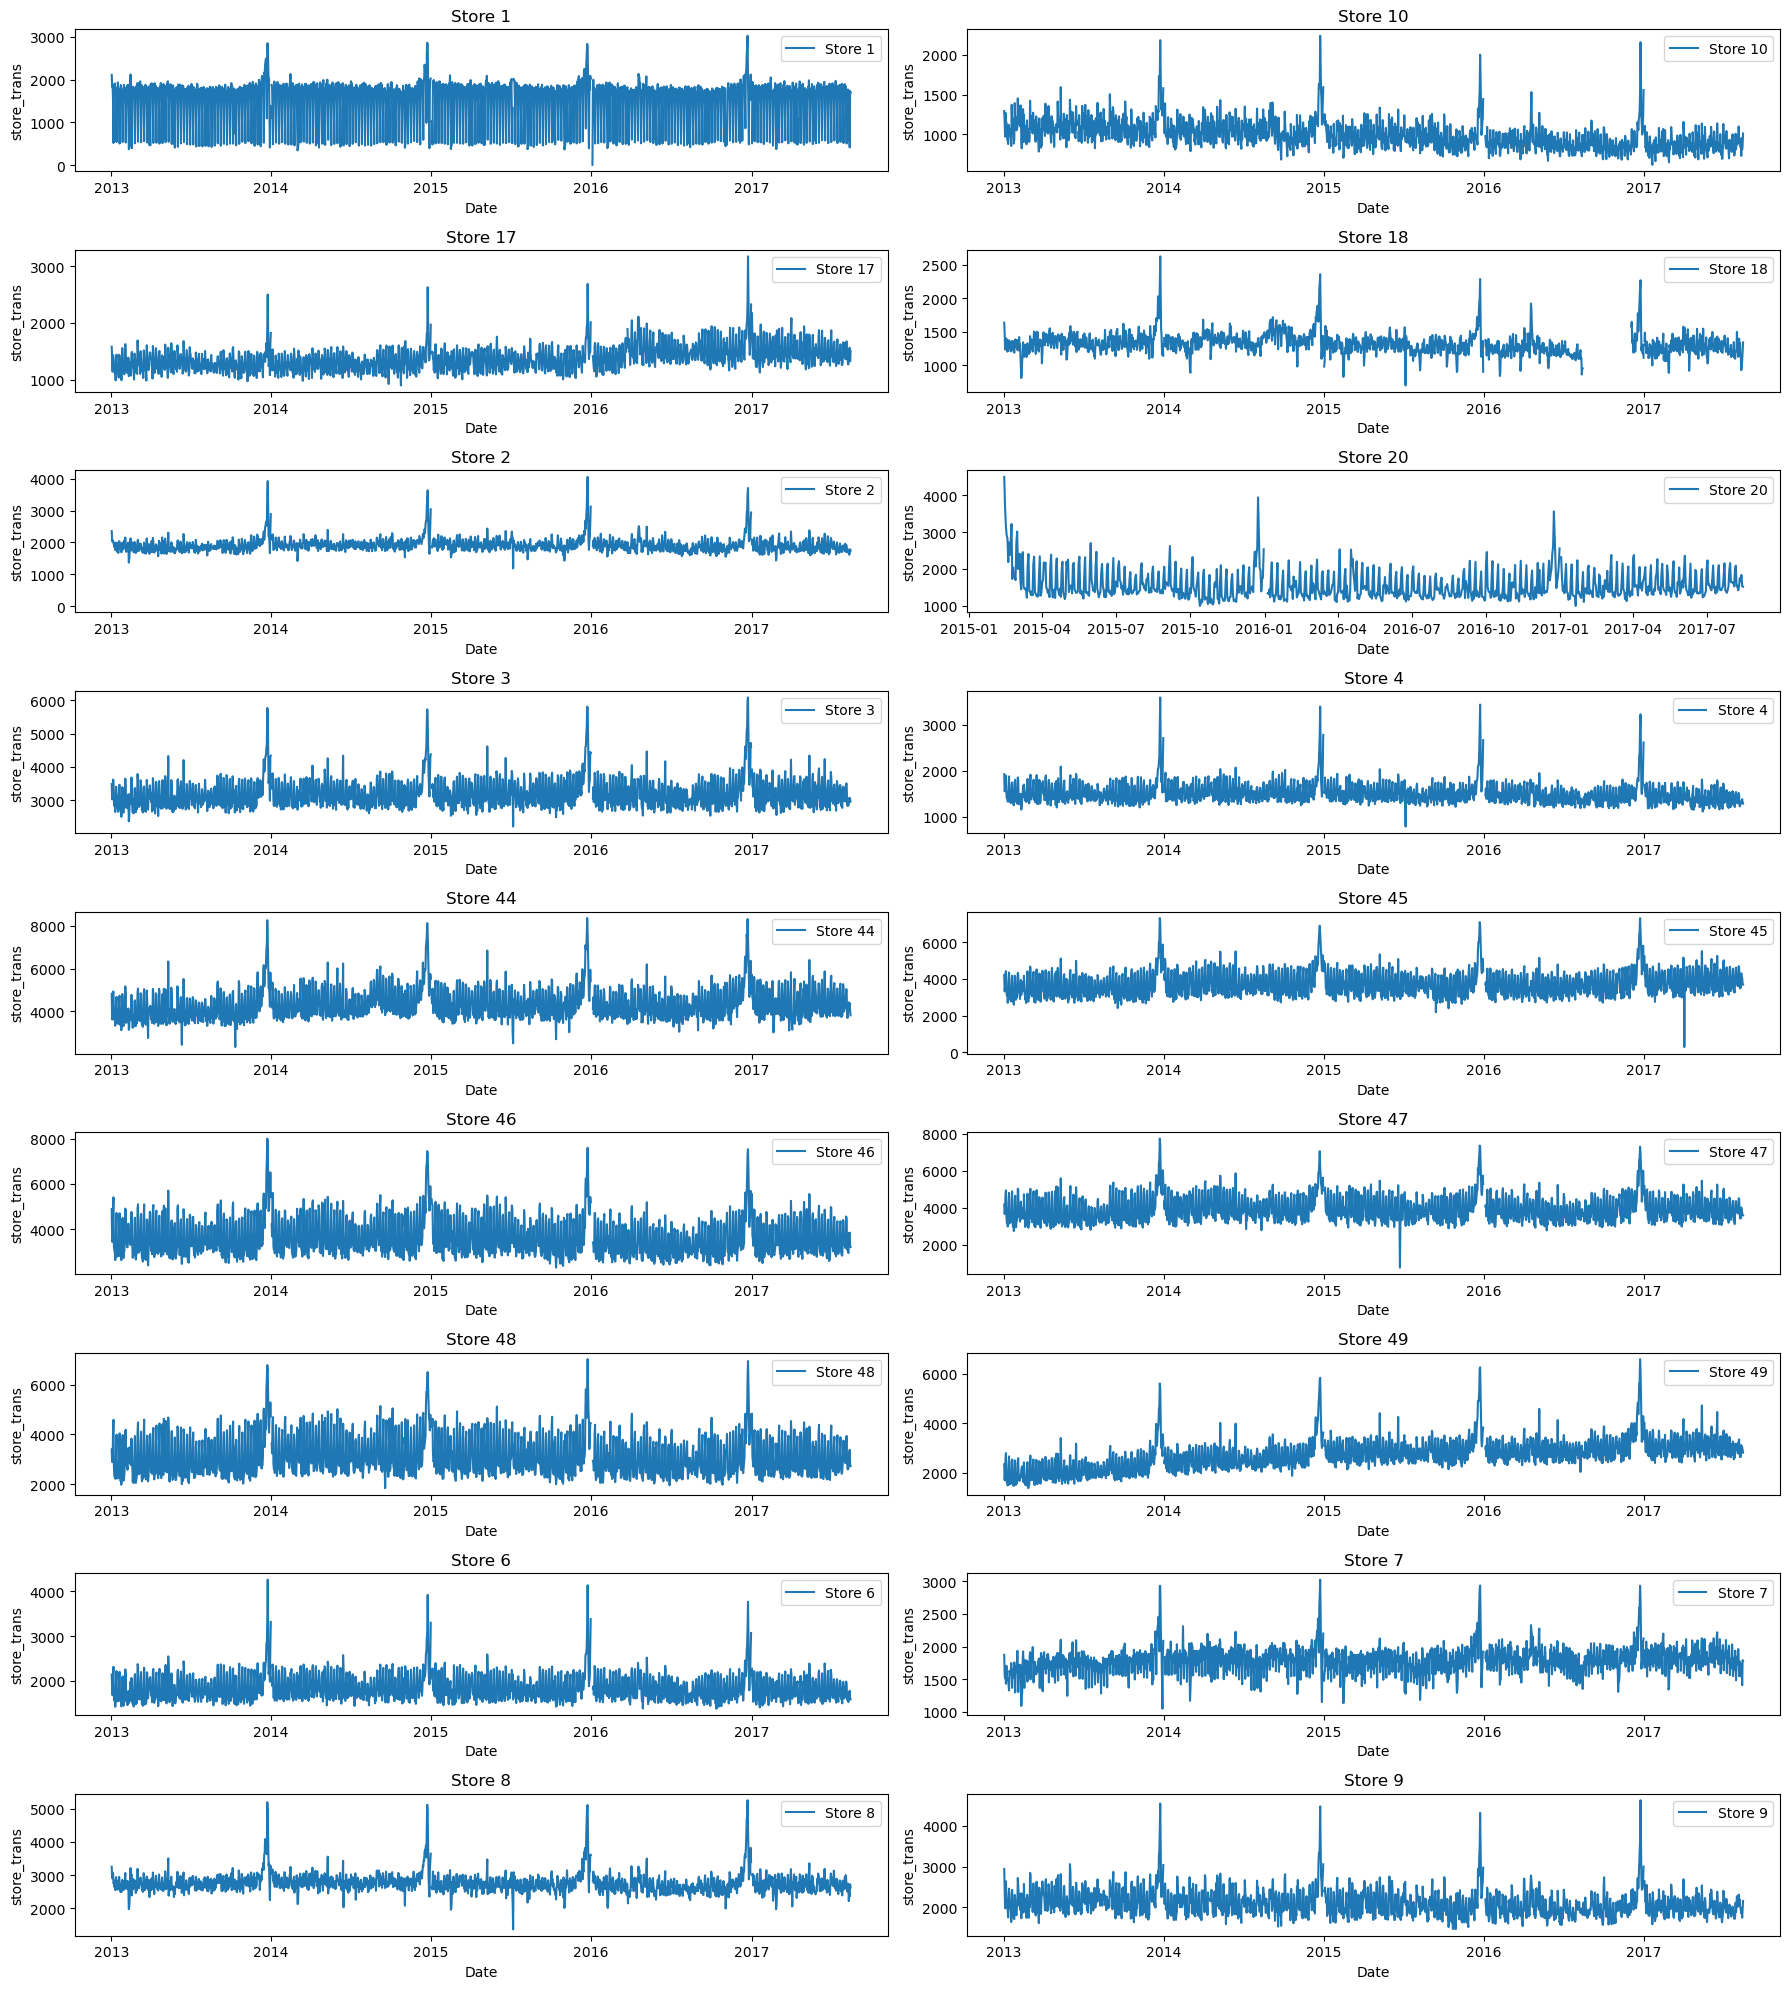

In [198]:
# Visualizing the missing data of each store
plt.figure(figsize=(18, 20))  # Adjusting figure size for better visualization

for i, store in enumerate(store_nbr_list):
    plt.subplot(9,2, i + 1)
    store_data = df_store_trans[df_store_trans["store_nbr"] == store]
    plt.plot(store_data.index, store_data["store_trans"], label='Store ' + str(store))
    plt.title('Store ' + str(store))
    plt.xlabel('Date')
    plt.ylabel('store_trans')
    plt.legend()

plt.tight_layout()
plt.show()

##### Store 18 has a chunck of continuous missing values; for this project, I am going to drop store 18 and predict 17 stores.

In [199]:
# Drop data of store 18
df=df[df["store_nbr"]!= 18]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143475 entries, 2013-01-01 to 2017-08-15
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   store_nbr                143475 non-null  int64  
 1   family                   143475 non-null  object 
 2   sales                    143475 non-null  float64
 3   onpromotion              143475 non-null  int64  
 4   sto_type                 143475 non-null  object 
 5   cluster                  143475 non-null  int64  
 6   holi_type                12575 non-null   object 
 7   locale                   12575 non-null   object 
 8   description_eng          12575 non-null   object 
 9   store_trans              138970 non-null  float64
 10  year                     143475 non-null  int32  
 11  month                    143475 non-null  int32  
 12  day                      143475 non-null  int32  
 13  dcoilwtico_interpolated  143475 non-null  f

##### The 17 stores have discrete missing values, and seasonality can be seen in all store sales, so I am using time series interpolation to fill the missing values.

In [200]:
# sanity check
df["store_nbr"].drop_duplicates().count()

17

In [201]:
# check missing dates for modeling
date_list = df.index.drop_duplicates()
full_date = pd.date_range(start=date_list.min(), end=date_list.max())
missing_dates = full_date.difference(date_list)
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

##### Data for four Christmas Days is missing, likely because the shop was closed on those days. I will leave the dates missing to avoid introducing bias.

##### From above graph, we can see that store 20 opened in 2015 instead of 2013 as other stores. We can fill the missing values for store 20 first then others.

In [202]:
# fill missing values of store 20
df_20 = df[df["store_nbr"]==20]
df_20.reset_index(inplace=True)
df_20.head(3)

,date,store_nbr,family,sales,onpromotion,sto_type,cluster,holi_type,locale,description_eng,store_trans,year,month,day,dcoilwtico_interpolated
0,2013-01-01,20,BEVERAGES,0.0,0,B,6,Holiday,National,First day of the year,NaN,2013,1,1,93.14
1,2013-01-01,20,CLEANING,0.0,0,B,6,Holiday,National,First day of the year,NaN,2013,1,1,93.14
2,2013-01-01,20,DAIRY,0.0,0,B,6,Holiday,National,First day of the year,NaN,2013,1,1,93.14


In [203]:
# check for the open date of store 20
df_20_null = df_20.loc[:,["date","store_trans"]].drop_duplicates()
df_20_null[df_20_null["store_trans"].isnull()].tail(10)

,date,store_trans
3830,2015-02-07,NaN
3835,2015-02-08,NaN
3840,2015-02-09,NaN
3845,2015-02-10,NaN
3850,2015-02-11,NaN
3855,2015-02-12,NaN
5465,2016-01-01,NaN
5475,2016-01-03,NaN
5480,2016-01-04,NaN
7304,2017-01-01,NaN


##### From above chart, we can conclude that store 20 opened on Feb 13th, 2015.

In [204]:
df_20_open = df_20[df_20["date"]>"2015-02-12"]
df_20_open.head()

,date,store_nbr,family,sales,onpromotion,sto_type,cluster,holi_type,locale,description_eng,store_trans,year,month,day,dcoilwtico_interpolated
3860,2015-02-13,20,BEVERAGES,2782.0,0,B,6,NaN,NaN,NaN,4500.0,2015,2,13,52.66
3861,2015-02-13,20,CLEANING,3635.0,2,B,6,NaN,NaN,NaN,4500.0,2015,2,13,52.66
3862,2015-02-13,20,DAIRY,1000.0,3,B,6,NaN,NaN,NaN,4500.0,2015,2,13,52.66
3863,2015-02-13,20,GROCERY I,9631.0,10,B,6,NaN,NaN,NaN,4500.0,2015,2,13,52.66
3864,2015-02-13,20,PRODUCE,0.0,0,B,6,NaN,NaN,NaN,4500.0,2015,2,13,52.66


In [205]:
# check for the dates that no sales of all stores happened
df_close = df[(df["sales"] ==0) & (df["store_trans"].isnull())]
df_close = df_close[df_close["store_nbr"] != 20]
df_close = df_close["store_nbr"].drop_duplicates()
df_close.groupby(df_close.index).count()

date
2013-01-01    16
Name: store_nbr, dtype: int64

##### No sales in all stores on Jan 1st 2013. We can drop this record.

In [206]:
df = df[df.index != "2013-01-01"]
df.head()

,store_nbr,family,sales,onpromotion,sto_type,cluster,holi_type,locale,description_eng,store_trans,year,month,day,dcoilwtico_interpolated
date,,,,,,,,,,,,,,
2013-01-02,1,BEVERAGES,1091.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14
2013-01-02,1,CLEANING,1060.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14
2013-01-02,1,DAIRY,579.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14
2013-01-02,1,GROCERY I,2652.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14
2013-01-02,1,PRODUCE,0.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14


In [207]:
# fill missing values of store 20
df_20_open = df_20_open.loc[:,["date","store_nbr","store_trans"]].drop_duplicates()
df_20_open.sort_values(by="date")
df_20_open.set_index("date",inplace=True)
df_20_open.head()

,store_nbr,store_trans
date,,
2015-02-13,20,4500.0
2015-02-14,20,3698.0
2015-02-15,20,3181.0
2015-02-16,20,2915.0
2015-02-17,20,2826.0


In [208]:
# use time series interpolation to fill nulls
df_20_open["store_trans_filled"] = df_20_open["store_trans"].interpolate(method="time")
df_20_open.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913 entries, 2015-02-13 to 2017-08-15
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_nbr           913 non-null    int64  
 1   store_trans         909 non-null    float64
 2   store_trans_filled  913 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 28.5 KB


##### No null values for store 20; I will fill the rest stores.

In [209]:
# get the data other than store 20
df_16stores = df[df["store_nbr"] != 20]
df_16stores=df_16stores.reset_index().loc[:,["date","store_nbr","store_trans"]].sort_values(by = "date").drop_duplicates()
df_16stores.set_index("date",inplace=True)
df_16stores.head()

,store_nbr,store_trans
date,,
2013-01-02,1,2111.0
2013-01-02,49,2346.0
2013-01-02,48,3397.0
2013-01-02,47,4161.0
2013-01-02,46,4886.0


In [210]:
# fill the null values
# List of stores
store_list = df_16stores["store_nbr"].drop_duplicates().to_list()

for s in store_list:
    # filter each store
    df_single_store = df_16stores[df_16stores["store_nbr"] == s]
    # Perform time-based interpolation
    df_16stores.loc[df_16stores["store_nbr"] == s, 'store_trans_filled'] = df_single_store['store_trans'].interpolate(method='time')

In [211]:
df_16stores.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26928 entries, 2013-01-02 to 2017-08-15
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_nbr           26928 non-null  int64  
 1   store_trans         26819 non-null  float64
 2   store_trans_filled  26928 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 841.5 KB


##### Till now, all null values in store transaction column have been filled; Next step is to join the filled tables with the original table.

In [212]:
df_store_trans_filled = pd.concat([df_20_open,df_16stores])
df_store_trans_filled = df_store_trans_filled.sort_index()

In [213]:
df = df.reset_index()
df.head()

,date,store_nbr,family,sales,onpromotion,sto_type,cluster,holi_type,locale,description_eng,store_trans,year,month,day,dcoilwtico_interpolated
0,2013-01-02,1,BEVERAGES,1091.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14
1,2013-01-02,1,CLEANING,1060.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14
2,2013-01-02,1,DAIRY,579.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14
3,2013-01-02,1,GROCERY I,2652.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14
4,2013-01-02,1,PRODUCE,0.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14


In [214]:
df_store_trans_filled = df_store_trans_filled.reset_index()
df_store_trans_filled.head()

,date,store_nbr,store_trans,store_trans_filled
0,2013-01-02,4,1922.0,1922.0
1,2013-01-02,3,3487.0,3487.0
2,2013-01-02,44,4821.0,4821.0
3,2013-01-02,10,1293.0,1293.0
4,2013-01-02,17,1580.0,1580.0


In [216]:
# join the table with filled store transactions
df_filled = pd.merge(left = df, right = df_store_trans_filled, how = 'left', on = ['date', 'store_nbr', 'store_trans'])
df_filled.head()

,date,store_nbr,family,sales,onpromotion,sto_type,cluster,holi_type,locale,description_eng,store_trans,year,month,day,dcoilwtico_interpolated,store_trans_filled
0,2013-01-02,1,BEVERAGES,1091.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14,2111.0
1,2013-01-02,1,CLEANING,1060.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14,2111.0
2,2013-01-02,1,DAIRY,579.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14,2111.0
3,2013-01-02,1,GROCERY I,2652.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14,2111.0
4,2013-01-02,1,PRODUCE,0.0,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14,2111.0


In [217]:
# sanity check
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143390 entries, 0 to 143389
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     143390 non-null  datetime64[ns]
 1   store_nbr                143390 non-null  int64         
 2   family                   143390 non-null  object        
 3   sales                    143390 non-null  float64       
 4   onpromotion              143390 non-null  int64         
 5   sto_type                 143390 non-null  object        
 6   cluster                  143390 non-null  int64         
 7   holi_type                12490 non-null   object        
 8   locale                   12490 non-null   object        
 9   description_eng          12490 non-null   object        
 10  store_trans              138970 non-null  float64       
 11  year                     143390 non-null  int32         
 12  month           

In [228]:
# sanity check on the nulls of store_trans_filled
df_filled[df_filled["store_trans_filled"].isnull()][["store_nbr","sales"]].drop_duplicates()

,store_nbr,sales
20,20,0.0


In [229]:
# sanity check on the filled results
df_filled[df_filled["store_trans_filled"]==df_filled["store_trans"]]

,date,store_nbr,family,sales,onpromotion,sto_type,cluster,holi_type,locale,description_eng,store_trans,year,month,day,dcoilwtico_interpolated,store_trans_filled
0,2013-01-02,1,BEVERAGES,1091.000,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14,2111.0
1,2013-01-02,1,CLEANING,1060.000,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14,2111.0
2,2013-01-02,1,DAIRY,579.000,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14,2111.0
3,2013-01-02,1,GROCERY I,2652.000,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14,2111.0
4,2013-01-02,1,PRODUCE,0.000,0,D,13,NaN,NaN,NaN,2111.0,2013,1,2,93.14,2111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143385,2017-08-15,9,BEVERAGES,3530.000,26,B,6,NaN,NaN,NaN,2155.0,2017,8,15,47.57,2155.0
143386,2017-08-15,9,CLEANING,1439.000,25,B,6,NaN,NaN,NaN,2155.0,2017,8,15,47.57,2155.0
143387,2017-08-15,9,DAIRY,835.000,19,B,6,NaN,NaN,NaN,2155.0,2017,8,15,47.57,2155.0
143388,2017-08-15,9,GROCERY I,6630.383,62,B,6,NaN,NaN,NaN,2155.0,2017,8,15,47.57,2155.0


##### Based on the sanity checks, we can confirm that the filled column has been correctly joined with the original table, and the remaining nulls in the filled column are due to the late opening date of store 20. I will save the table for time series prediction of store transactions.

In [234]:
# save the dataset
df_filled = df_filled.drop(columns = "store_trans")
df_filled.to_csv("filled_store_trans.csv", index=False)

#### 3. Check for the distributions of categorical data

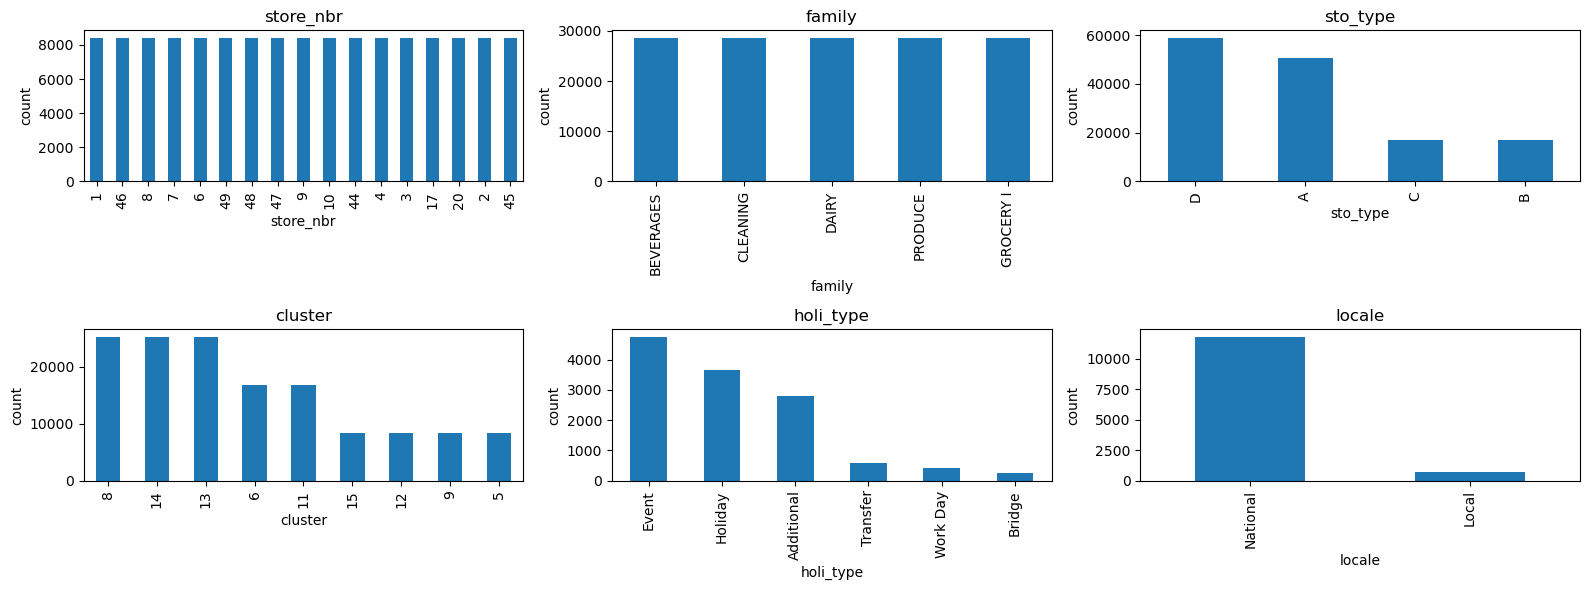

In [230]:
cols = ["store_nbr","family","sto_type","cluster","holi_type","locale"]
plt.subplots(2,3, figsize=(16,6))
for i, col in enumerate(cols):
    plt.subplot(2,3,i+1)
    df[col].value_counts().plot(kind="bar")
    plt.ylabel("count")
    plt.title(col)
plt.tight_layout()
plt.show()

#### 4. Check for the Xs' relationships with the target

In [81]:
# check for holidays
df["description_eng"].value_counts(ascending=False)

description_eng
Carnival                    850
Holy Friday                 425
Labor Day                   425
MOTHER DAY-1                425
Mother's Day                425
                           ... 
RECOVERY DAY OF THE DEAD     85
Manabi+2 earthquake          84
Manabi+10 earthquake         84
Manabi+16 earthquake         84
Manabi+5 earthquake          83
Name: count, Length: 70, dtype: int64

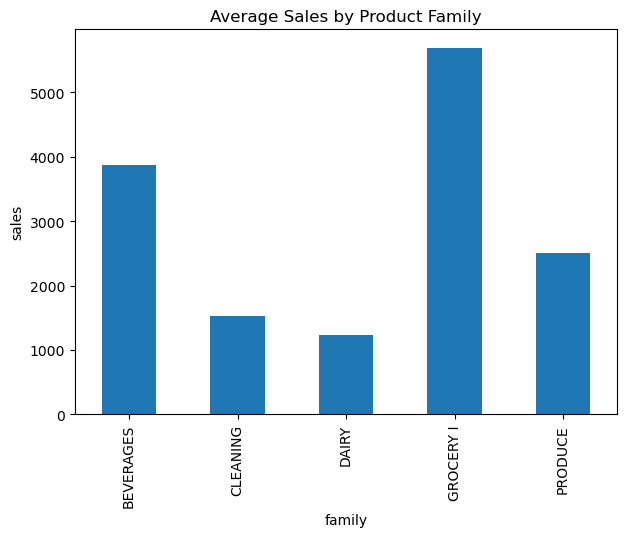

In [82]:
# check for avg sales by family
plt.figure(figsize=(7,5))
df.groupby(["family"])["sales"].mean().plot(kind="bar")
plt.ylabel("sales")
plt.title("Average Sales by Product Family")
plt.show()

There are many nulls in holi_type column; to get the sales of the null category in the column, I need to fill the nulls with non_holi.

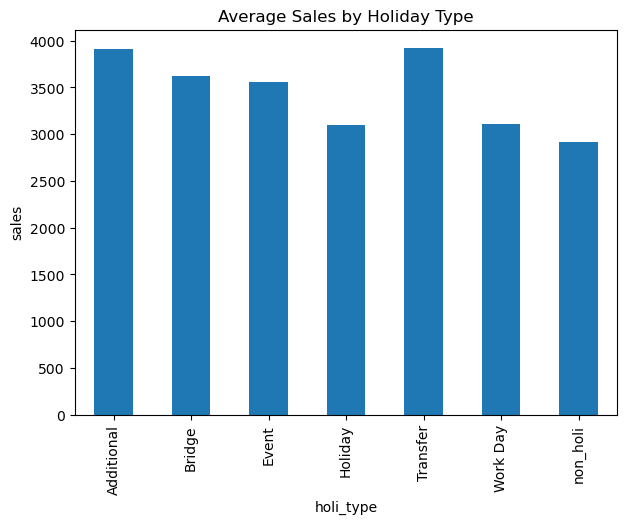

In [83]:
# check for avg sales by holiday
plt.figure(figsize=(7,5))
df['holi_type'].fillna('non_holi', inplace=True)
df.groupby(["holi_type"])["sales"].mean().plot(kind="bar")
plt.ylabel("sales")
plt.title("Average Sales by Holiday Type")
plt.show()

To avoid creating non_holi dummy variable, I will change the non_holi back to na

In [84]:
# change the non_holi back to NaN
df['holi_type'].replace('non_holi', np.nan, inplace=True)

#### 4. Use one hot coding for the above categorical columns and description_eng

In [85]:
# change the categorical columns from numbers to string
df["store_nbr"] = df["store_nbr"].astype(str)
df["cluster"] = df["cluster"].astype(str)
# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143475 entries, 2013-01-01 to 2017-08-15
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   store_nbr                143475 non-null  object 
 1   family                   143475 non-null  object 
 2   sales                    143475 non-null  float64
 3   onpromotion              143475 non-null  int64  
 4   sto_type                 143475 non-null  object 
 5   cluster                  143475 non-null  object 
 6   holi_type                12575 non-null   object 
 7   locale                   12575 non-null   object 
 8   description_eng          12575 non-null   object 
 9   store_trans              138970 non-null  float64
 10  year                     143475 non-null  int32  
 11  month                    143475 non-null  int32  
 12  day                      143475 non-null  int32  
 13  dcoilwtico_interpolated  143475 non-null  f

In [86]:
df_encoded = pd.get_dummies(df,columns=['store_nbr','family','sto_type','cluster','holi_type','locale','description_eng'], dtype='int')
df_encoded.head()

,sales,onpromotion,store_trans,year,month,day,dcoilwtico_interpolated,store_nbr_1,store_nbr_10,store_nbr_17,...,description_eng_WORLD OF FOOTBALL BRAZIL: ECUADOR-HONDURAS,description_eng_WORLD OF FOOTBALL BRAZIL: ECUADOR-SUIZA,description_eng_WORLD OF FOOTBALL BRAZIL: Ecuador-France,description_eng_WORLD OF FOOTBALL BRAZIL: Eighth of Final,description_eng_WORLD OF FOOTBALL BRAZIL: FINAL,description_eng_World Cup Brazil: Quarter Final,description_eng_World Cup Brazil: Semifinals,description_eng_World Cup Brazil: Third and fourth place,description_eng_World Football Inauguration Brazil,description_eng_foundation of Quito
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0,NaN,2013,1,1,93.14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,0.0,0,NaN,2013,1,1,93.14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,0.0,0,NaN,2013,1,1,93.14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,0.0,0,NaN,2013,1,1,93.14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,0.0,0,NaN,2013,1,1,93.14,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 5. Feature engineering of date

In [87]:
df_encoded.reset_index(inplace=True)
df_encoded["year"]=df_encoded["date"].dt.year
df_encoded["month"]=df_encoded["date"].dt.month
df_encoded["day"]=df_encoded["date"].dt.day
df_encoded["weekday"]=np.where(df_encoded["date"].dt.weekday<5,df_encoded["date"].dt.weekday+1,0)
df_encoded["weekend"]=np.where(df_encoded["date"].dt.weekday>=5,1,0)
df_encoded2 = df_encoded.drop(columns="date")

In [88]:
# sanity check
df_encoded2.head()

,sales,onpromotion,store_trans,year,month,day,dcoilwtico_interpolated,store_nbr_1,store_nbr_10,store_nbr_17,...,description_eng_WORLD OF FOOTBALL BRAZIL: Ecuador-France,description_eng_WORLD OF FOOTBALL BRAZIL: Eighth of Final,description_eng_WORLD OF FOOTBALL BRAZIL: FINAL,description_eng_World Cup Brazil: Quarter Final,description_eng_World Cup Brazil: Semifinals,description_eng_World Cup Brazil: Third and fourth place,description_eng_World Football Inauguration Brazil,description_eng_foundation of Quito,weekday,weekend
0,0.0,0,NaN,2013,1,1,93.14,1,0,0,...,0,0,0,0,0,0,0,0,2,0
1,0.0,0,NaN,2013,1,1,93.14,1,0,0,...,0,0,0,0,0,0,0,0,2,0
2,0.0,0,NaN,2013,1,1,93.14,1,0,0,...,0,0,0,0,0,0,0,0,2,0
3,0.0,0,NaN,2013,1,1,93.14,1,0,0,...,0,0,0,0,0,0,0,0,2,0
4,0.0,0,NaN,2013,1,1,93.14,1,0,0,...,0,0,0,0,0,0,0,0,2,0


In [89]:
df_encoded2["weekend"].value_counts()

weekend
0    102335
1     41140
Name: count, dtype: int64

In [90]:
# sanity check for null values
sum(df_encoded2.isnull().sum())

4505

#### There are no null values in the dataset. All the columns are in numerical format. We can do a baseline model.

In [51]:
# save the dataset
df_encoded2.to_csv("full_data.csv", index=False)